In [1]:
from pydoc import doc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import nibabel as nib
import random
from scipy import stats
import argparse
import sys
import os.path 
from sklearn import metrics
import seaborn as sns
from scipy.stats import chisquare

In [41]:
results_dir = '/home/varshini/scratch/src/thesis_glucksberg/output/clf_betas_19_apr/'

control_p = ['P054','P057','P064','P065','P067','P068','P072','P073','P075','P076','P080','P081']
ASD_p     = ['P050','P055','P056','P058','P059','P060','P066','P069','P070','P071','P078','P079']

all_participants = sorted(ASD_p + control_p)

In [42]:
def load_results(participant, results_dir):
        
    with open(results_dir + participant + '_cm.pkl','rb') as f:
        cm = pk.load(f)
        
    return cm

In [43]:
def avg_cm(cm):
    cnf_avg = np.zeros((4,4))

    for matrix in cm:

        cnf_avg = cnf_avg + matrix

    cnf_avg = cnf_avg/len(cm)
    
    return cnf_avg

/home/varshini/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


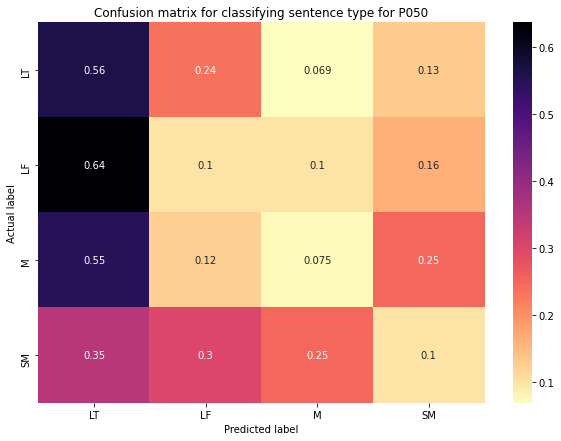

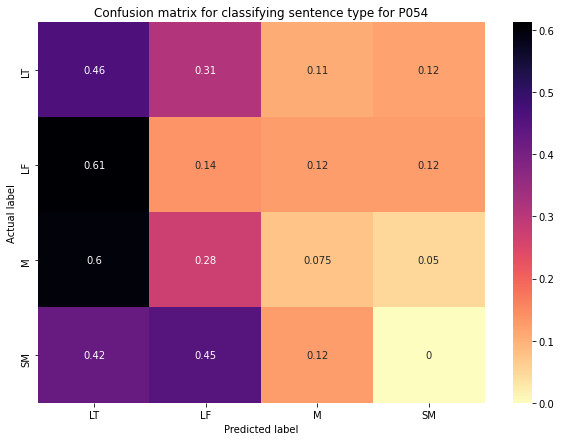

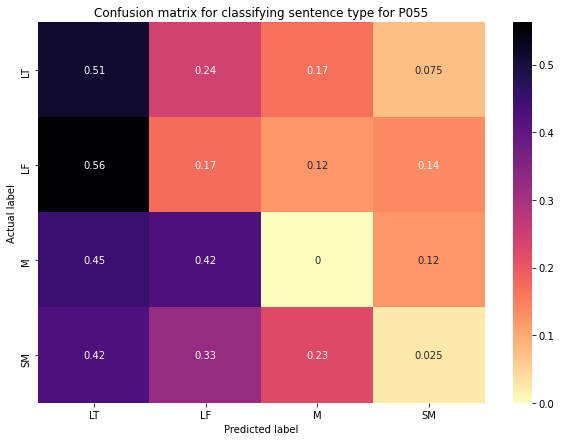

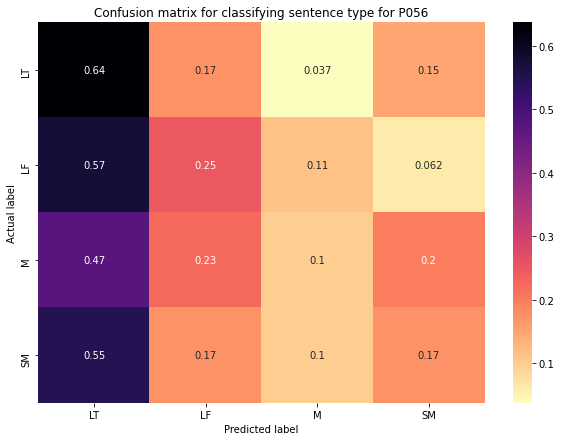

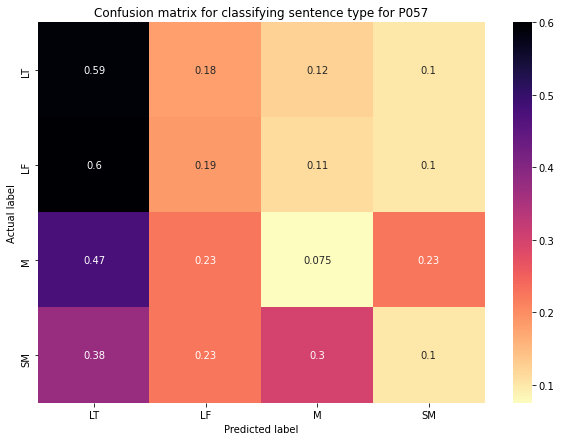

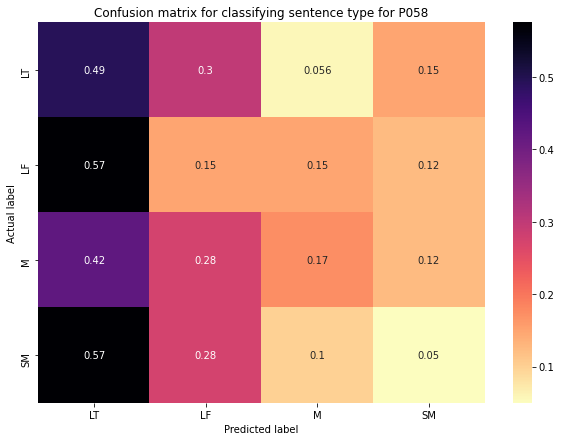

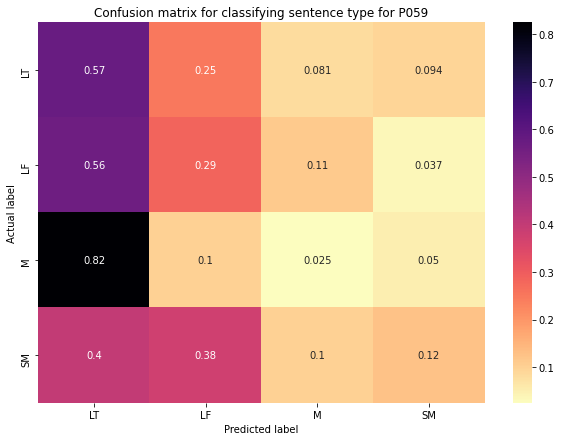

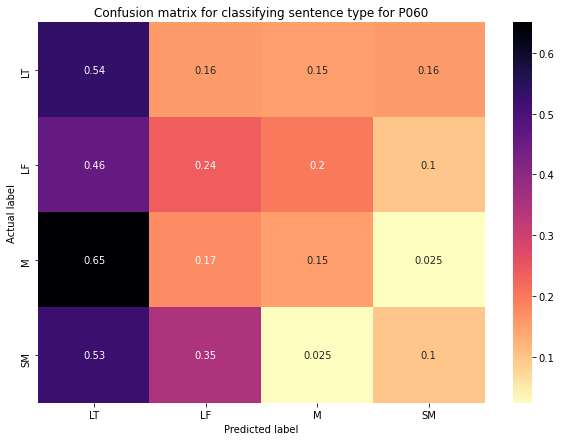

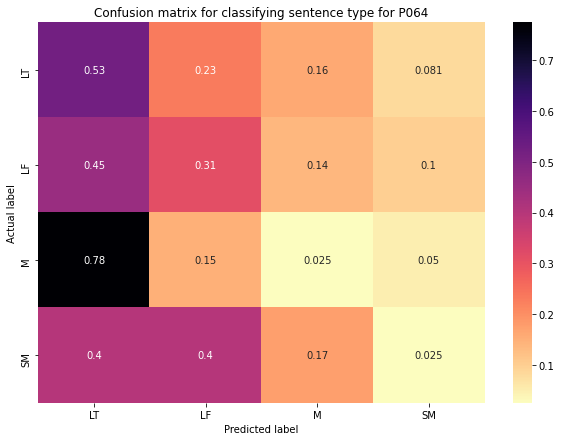

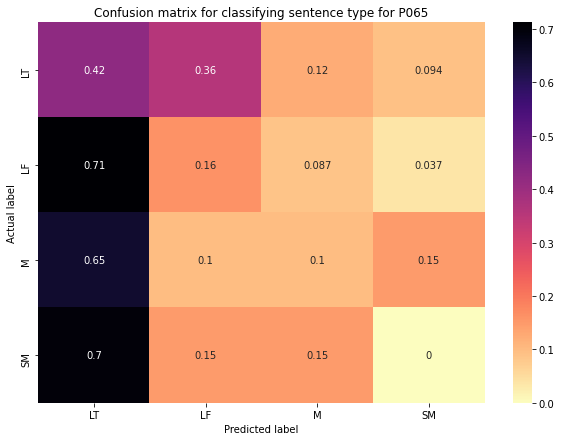

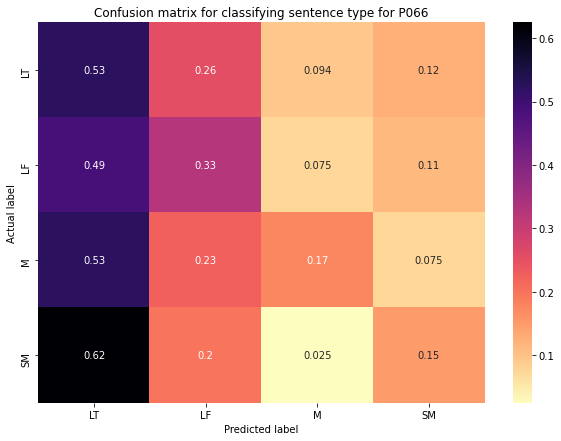

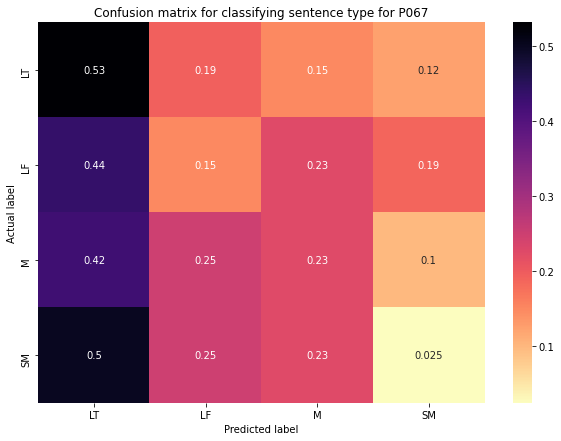

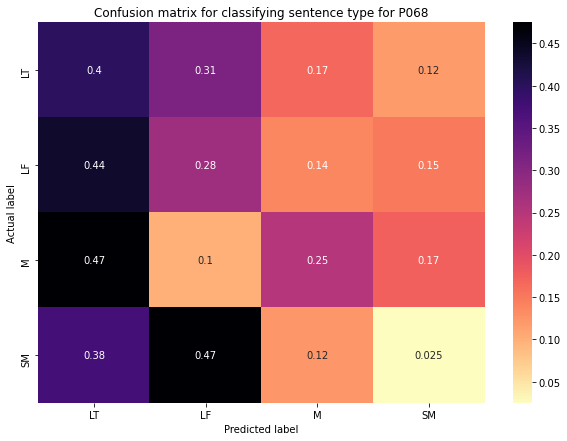

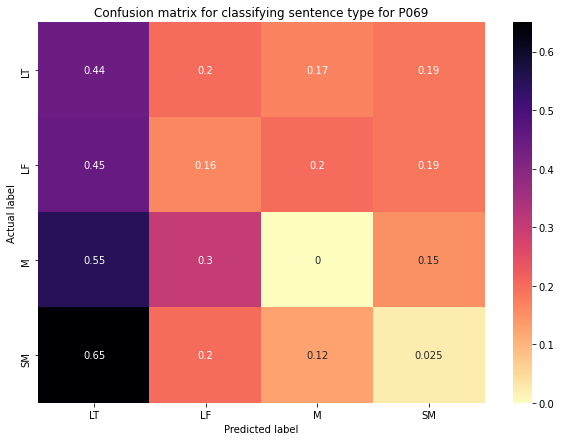

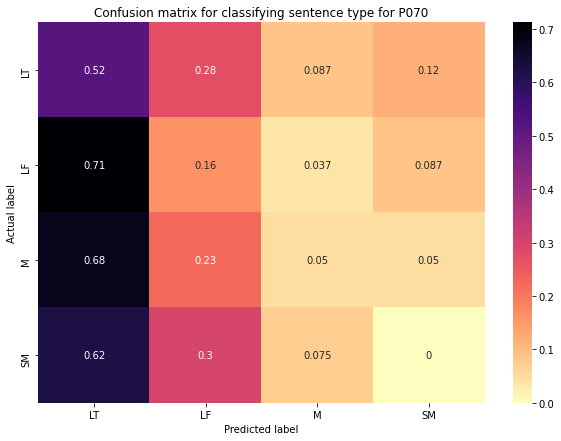

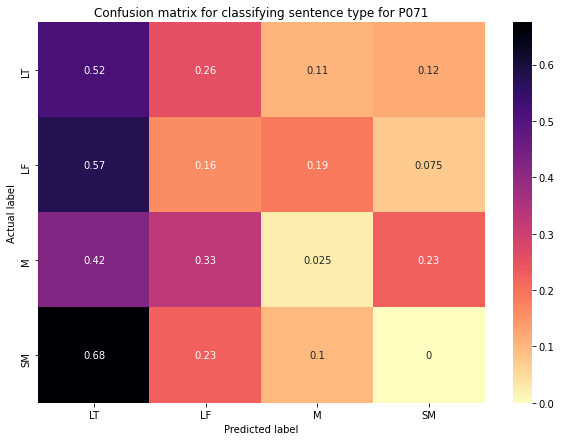

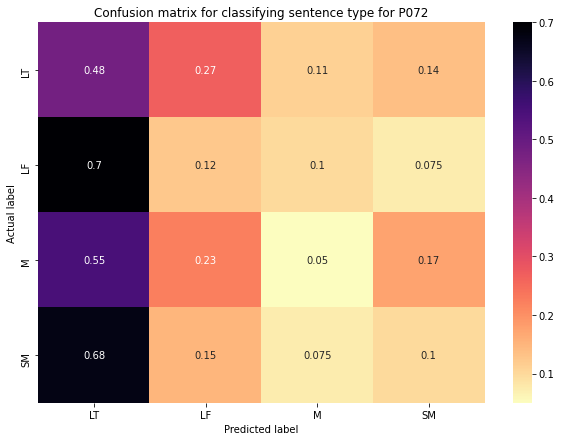

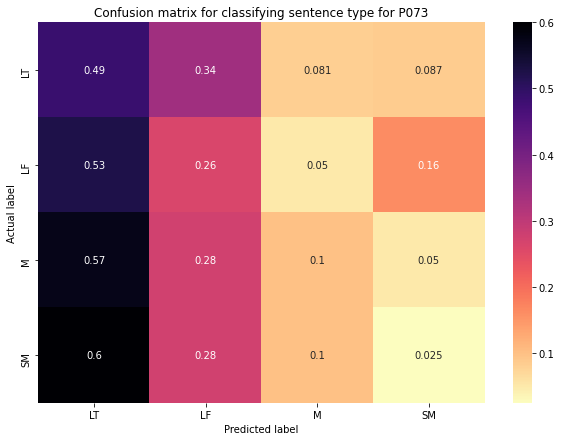

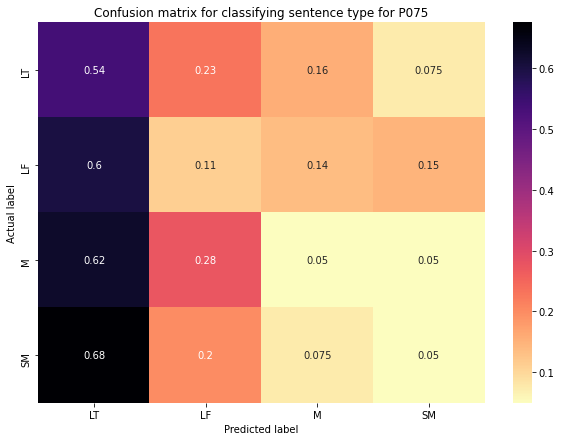

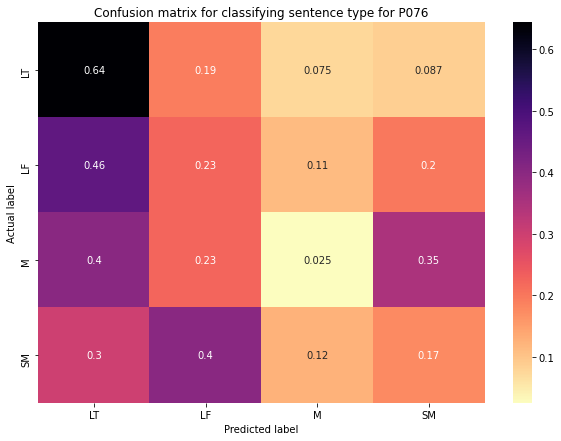

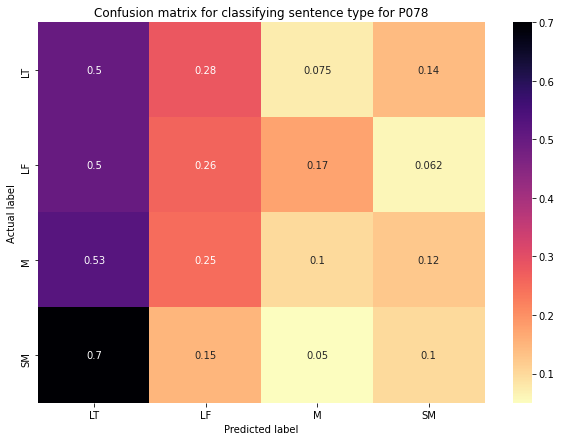

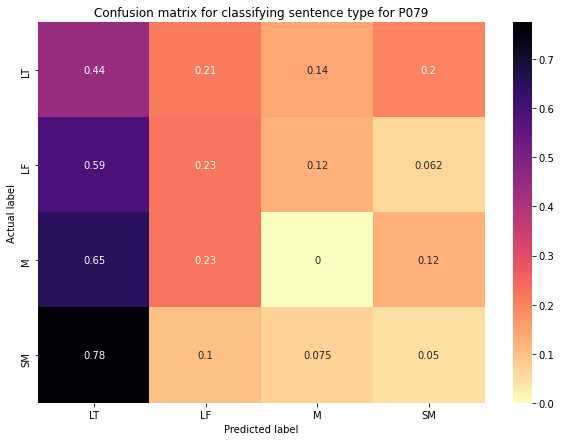

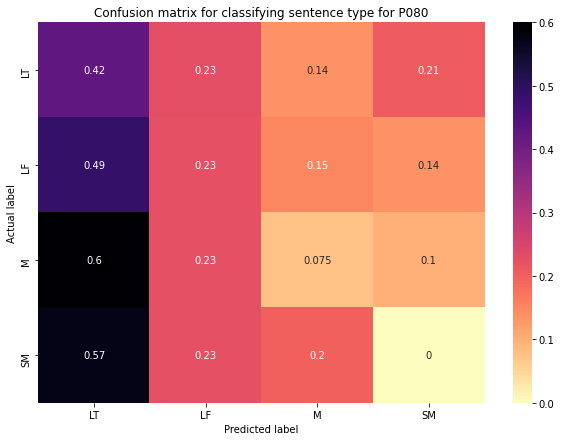

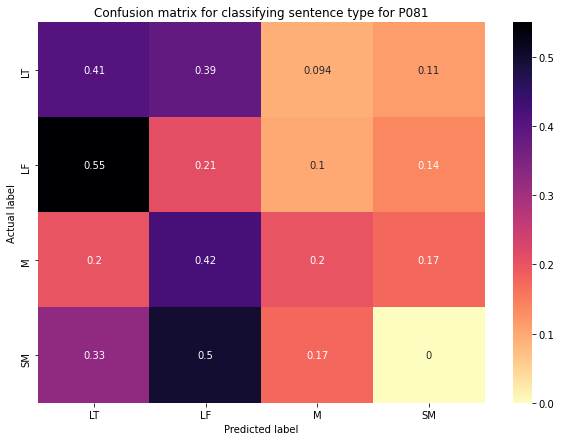

In [44]:
cm_dict = {}

for participant in all_participants:
    
    cm = load_results(participant,results_dir)
    cm_avg = avg_cm(cm)
    cm_dict[participant] = cm_avg
    
    df_cm = pd.DataFrame(cm_avg, index = [i for i in ['LT','LF','M','SM']],
                      columns = [i for i in ['LT','LF','M','SM']])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap="magma_r")
    
    plt.title('Confusion matrix for classifying sentence type for ' + participant)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [47]:
ASD_cm, Control_cm = [], []
for participant in all_participants:
    
    if participant in ASD_p:
        ASD_cm.append(cm_dict[participant])
        
    if participant in control_p:
        Control_cm.append(cm_dict[participant])
        
ASD_cm, Control_cm = np.array(ASD_cm), np.array(Control_cm)
ASD_avg, Control_avg = avg_cm(ASD_cm), avg_cm(Control_cm)

In [48]:
print(ASD_cm.shape)
print(Control_cm.shape)

(12, 4, 4)
(12, 4, 4)


Text(0.5, 42.0, 'Predicted label')

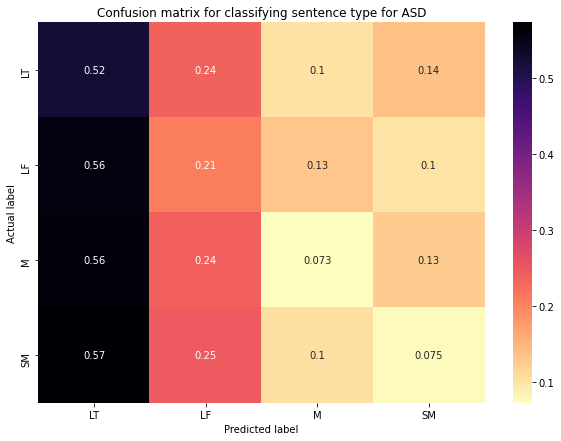

In [49]:
df_cm = pd.DataFrame(ASD_avg, index = [i for i in ['LT','LF','M','SM']],
                  columns = [i for i in ['LT','LF','M','SM']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="magma_r")
plt.title('Confusion matrix for classifying sentence type for ASD')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 42.0, 'Predicted label')

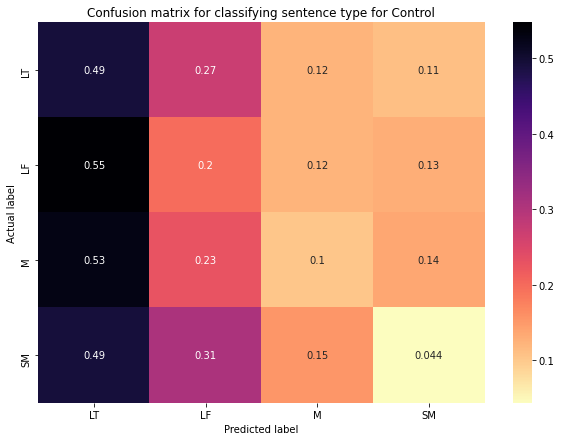

In [50]:
df_cm = pd.DataFrame(Control_avg, index = [i for i in ['LT','LF','M','SM']],
                  columns = [i for i in ['LT','LF','M','SM']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="magma_r")
plt.title('Confusion matrix for classifying sentence type for Control')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')